# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read 'gold_price_usd.csv' & store it in a variable

In [3]:
df=pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [4]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [6]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [10]:
df=df.rename(columns={'USD (AM)':'Price'})

#### Check if there are any missing values in the dataset

In [11]:
df.isna().sum()

Date     0
Price    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [12]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [13]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4718 non-null   object 
 1   Price   4718 non-null   float64
 2   year    4718 non-null   int64  
 3   month   4718 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 147.6+ KB


#### Create a new column with Year

In [16]:
df.head()

,Date,Price,year,month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### Create a new column with Months

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [17]:
#Years
df['year']

0       2001
1       2001
2       2001
3       2001
4       2001
        ... 
4713    2019
4714    2019
4715    2019
4716    2019
4717    2019
Name: year, Length: 4718, dtype: int64

In [18]:
#Months
df['month']

0       1
1       1
2       1
3       1
4       1
       ..
4713    8
4714    8
4715    8
4716    8
4717    9
Name: month, Length: 4718, dtype: int64

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

<AxesSubplot:xlabel='year', ylabel='month'>

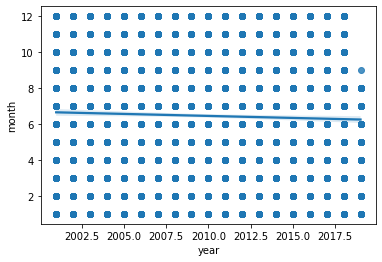

In [20]:
sns.regplot(x=df['year'],y=df['month'])

### Plot a histplot to find the variation in price

<AxesSubplot:xlabel='year', ylabel='Price'>

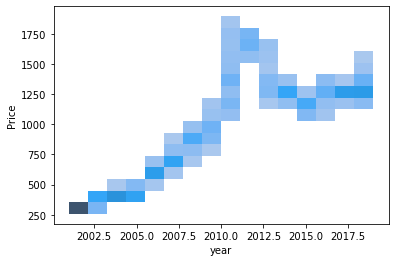

In [25]:

sns.histplot(x=df['year'],y=df['Price'])

### Assign year and price in x and y variables

In [26]:
X = df[['year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [27]:
# import train_test split
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

## Train Data

In [29]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [31]:
model=LinearRegression()

### Train the  model

In [32]:
model.fit(X_train,y_train)

LinearRegression()

### Check the score of our model

In [33]:
model.score(X_train,y_train)

0.7048691960222999

### Check the coefficient and Intercept

In [34]:
#print the intercept
model.intercept_

-140074.32374779362

In [35]:
#print the coefficent
model.coef_


array([70.17366927])

### Make Prediction with Test data

In [45]:
# Also store the predicted values in a variable
y_pred=pd.DataFrame(model.predict(X_test))
y_test.reset_index(drop=True,inplace=True)
y_test

0        425.50
1        307.80
2       1335.75
3        687.25
4        924.75
         ...   
1411    1088.00
1412    1250.75
1413    1776.50
1414     276.50
1415    1222.05
Name: Price, Length: 1416, dtype: float64

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [50]:
X_test.reset_index(drop=True,inplace=True)
X_test['Y_test']=y_test
X_test['Prediction']=y_pred
X_test.set_index('year')

C:\Users\Aaron\AppData\Local\Temp/ipykernel_1152/2456431991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Y_test']=y_test
C:\Users\Aaron\AppData\Local\Temp/ipykernel_1152/2456431991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Prediction']=y_pred


,Y_test,Prediction
year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


### Check the mean absolute error, mean square error

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
# Mean absolute error
mean_absolute_error(y_test,y_pred)

186.24273893873823

In [52]:
# Mean squared error
mean_squared_error(y_test,y_pred)

58032.97376893202

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [56]:
model.predict([[2025],[2026],[2027],[2028],[2030]])

array([2027.35652254, 2097.53019181, 2167.70386108, 2237.87753035,
       2378.22486888])

# <span style = "color:green;font-size:40px"> Great Job!</span>

***